In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
n225 = pd.read_csv("/content/drive/MyDrive/GDP_N225/datasets/^N225_daily_data_2.csv", index_col=0)
n225 = n225.groupby(["year"])["year", "POSIX", "Adj Close"].mean().reset_index(drop=True)
n225.head()

<ipython-input-29-98e8e76a2983>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  n225 = n225.groupby(["year"])["year", "POSIX", "Adj Close"].mean().reset_index(drop=True)


,year,POSIX,Adj Close
0,1980.0,3.322481e+08,6882.193706
1,1981.0,3.630011e+08,7516.848707
2,1982.0,3.943854e+08,7387.732454
3,1983.0,4.258992e+08,8806.450587
4,1984.0,4.575882e+08,10564.541401


In [30]:
n225.tail()

,year,POSIX,Adj Close
39,2019.0,1.562199e+09,21697.226173
40,2020.0,1.593814e+09,22703.032259
41,2021.0,1.625318e+09,28836.538640
42,2022.0,1.656901e+09,27257.789895
43,2023.0,1.685060e+09,30197.597737


In [31]:
gdp = pd.read_csv("/content/drive/MyDrive/GDP_N225/datasets/gdp.csv", index_col=0)
gdp.head()

,year,Billion Yen
0,1994,511958.8
1,1995,525299.5
2,1996,538659.6
3,1997,542508.0
4,1998,534564.1


In [32]:
gdp.tail()

,year,Billion Yen
24,2018,556570.5
25,2019,556782.9
26,2020,537889.7
27,2021,551434.5
28,2022,562707.7


In [33]:
n225 = n225[(n225["year"] >=1994.0) & (n225["year"] <= 2022.0)].reset_index(drop=True)

In [34]:
n225.shape, gdp.shape

((29, 3), (29, 2))

In [35]:
years = 4

for i in range(1, years):
    n225[f"{i}_Adj Close"] = n225["Adj Close"].shift(i)
    gdp[f"{i}_year_ago"] = gdp["Billion Yen"].shift(i)

n225 = n225.dropna(axis=0).reset_index(drop=True)
gdp = gdp.dropna(axis=0).reset_index(drop=True)
print(f"n225.shape: {n225.shape}, gdp.shape: {gdp.shape}")

n225.shape: (26, 6), gdp.shape: (26, 5)


In [36]:
gdp.head()

,year,Billion Yen,1_year_ago,2_year_ago,3_year_ago
0,1997,542508.0,538659.6,525299.5,511958.8
1,1998,534564.1,542508.0,538659.6,525299.5
2,1999,530298.6,534564.1,542508.0,538659.6
3,2000,537614.2,530298.6,534564.1,542508.0
4,2001,527410.5,537614.2,530298.6,534564.1


In [37]:
gdp.tail()

,year,Billion Yen,1_year_ago,2_year_ago,3_year_ago
21,2018,556570.5,555712.5,544829.9,540740.8
22,2019,556782.9,556570.5,555712.5,544829.9
23,2020,537889.7,556782.9,556570.5,555712.5
24,2021,551434.5,537889.7,556782.9,556570.5
25,2022,562707.7,551434.5,537889.7,556782.9


In [38]:
n225.head()

,year,POSIX,Adj Close,1_Adj Close,2_Adj Close,3_Adj Close
0,1997.0,8.678139e+08,18397.179314,21088.353191,17329.703874,19935.897172
1,1998.0,8.993925e+08,15355.993152,18397.179314,21088.353191,17329.703874
2,1999.0,9.309233e+08,16823.405473,15355.993152,18397.179314,21088.353191
3,2000.0,9.625615e+08,17145.006592,16823.405473,15355.993152,18397.179314
4,2001.0,9.941145e+08,12093.560658,17145.006592,16823.405473,15355.993152


In [39]:
n225.tail()

,year,POSIX,Adj Close,1_Adj Close,2_Adj Close,3_Adj Close
21,2018.0,1.530551e+09,22311.891872,20209.025446,16920.476295,19203.767146
22,2019.0,1.562199e+09,21697.226173,22311.891872,20209.025446,16920.476295
23,2020.0,1.593814e+09,22703.032259,21697.226173,22311.891872,20209.025446
24,2021.0,1.625318e+09,28836.538640,22703.032259,21697.226173,22311.891872
25,2022.0,1.656901e+09,27257.789895,28836.538640,22703.032259,21697.226173


In [40]:
df = pd.merge(gdp, n225, left_on="year", right_on="year", how="inner")

In [41]:
df.head()

,year,Billion Yen,1_year_ago,2_year_ago,3_year_ago,POSIX,Adj Close,1_Adj Close,2_Adj Close,3_Adj Close
0,1997,542508.0,538659.6,525299.5,511958.8,8.678139e+08,18397.179314,21088.353191,17329.703874,19935.897172
1,1998,534564.1,542508.0,538659.6,525299.5,8.993925e+08,15355.993152,18397.179314,21088.353191,17329.703874
2,1999,530298.6,534564.1,542508.0,538659.6,9.309233e+08,16823.405473,15355.993152,18397.179314,21088.353191
3,2000,537614.2,530298.6,534564.1,542508.0,9.625615e+08,17145.006592,16823.405473,15355.993152,18397.179314
4,2001,527410.5,537614.2,530298.6,534564.1,9.941145e+08,12093.560658,17145.006592,16823.405473,15355.993152


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         26 non-null     int64  
 1   Billion Yen  26 non-null     float64
 2   1_year_ago   26 non-null     float64
 3   2_year_ago   26 non-null     float64
 4   3_year_ago   26 non-null     float64
 5   POSIX        26 non-null     float64
 6   Adj Close    26 non-null     float64
 7   1_Adj Close  26 non-null     float64
 8   2_Adj Close  26 non-null     float64
 9   3_Adj Close  26 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 2.2 KB


In [43]:
X = df.drop(["Billion Yen"], axis=1).values
y = df["Billion Yen"].values

In [44]:
N = len(df["year"])
N_train = round(N * .8)

In [45]:
X_train, y_train = X[:N_train], y[:N_train]
X_test, y_test = X[N_train:], y[N_train:]

In [46]:
from sklearn.cross_decomposition import PLSRegression

plsr = PLSRegression(n_components=3)
plsr.fit(X_train, y_train)

PLSRegression(n_components=3)

In [47]:
plsr.score(X_test, y_test)

0.17951362469460197

In [48]:
plsr.score(X_train, y_train)

0.854960533027639

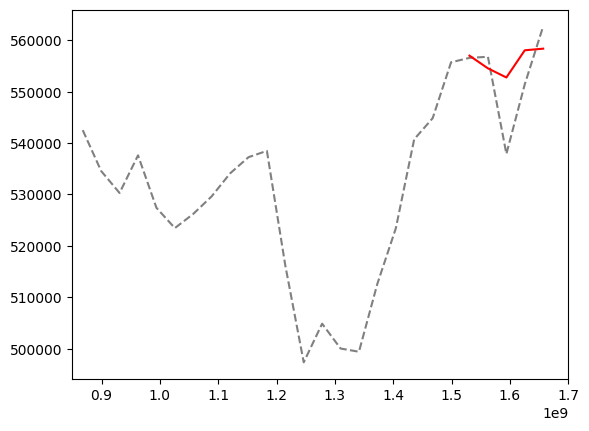

In [52]:
plt.plot(X, y, color="gray", linestyle="--")
plt.plot(X_test, plsr.predict(X_test), color="red")
plt.xlim([.85e9, 1.7e9])
plt.show()